In [787]:
import pandas as pd

train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

In [788]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [789]:
train.shape

(891, 12)

In [790]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [791]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [792]:
def bart_char(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['survived','dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

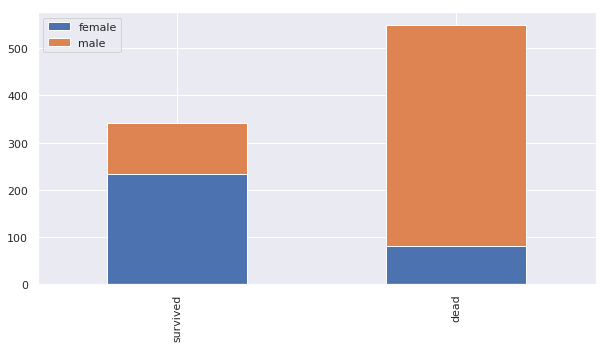

In [793]:
bart_char('Sex')

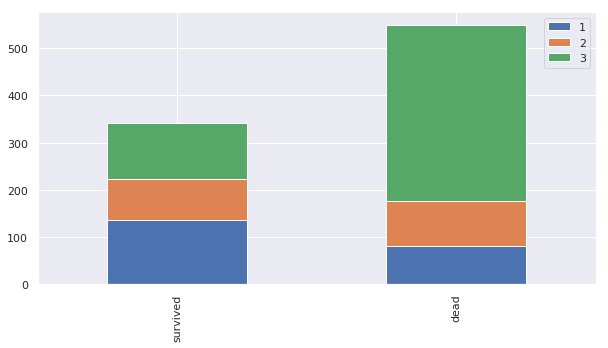

In [794]:
bart_char('Pclass')

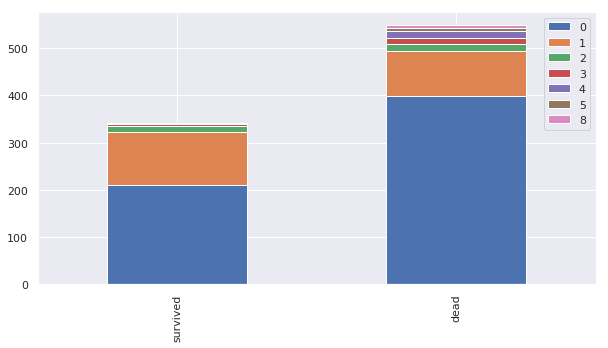

In [795]:
bart_char('SibSp')

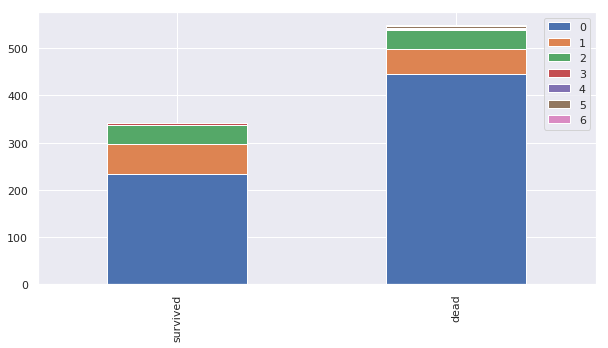

In [796]:
bart_char('Parch')

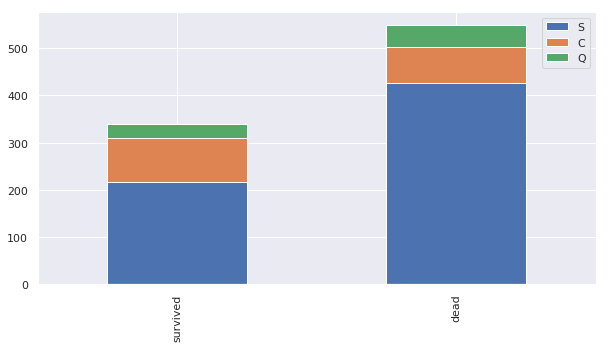

In [797]:
bart_char('Embarked')

In [798]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [799]:
#### FEATURE INGENIERING

In [800]:
### NAME

train_test_data=[train,test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [801]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Don           1
Countess      1
Mme           1
Jonkheer      1
Capt          1
Lady          1
Sir           1
Name: Title, dtype: int64

In [802]:
### Mr=0, Miss=1, Mrs=2, otro=3

tittle_map = {"Mr": 0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Jonkheer":3,"Sir":3,"Mme":3,"Countess":3,"Lady":3,"Capt":3,"Don":3,"Ms":3}

for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(tittle_map)


In [803]:
    train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


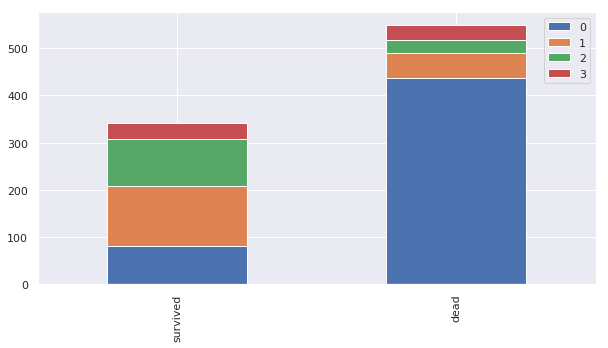

In [804]:
bart_char('Title')

In [805]:
sex_map={"male": 0,"female": 1}

for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_map)
    

In [806]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


In [807]:
## Añadir edades

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [808]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


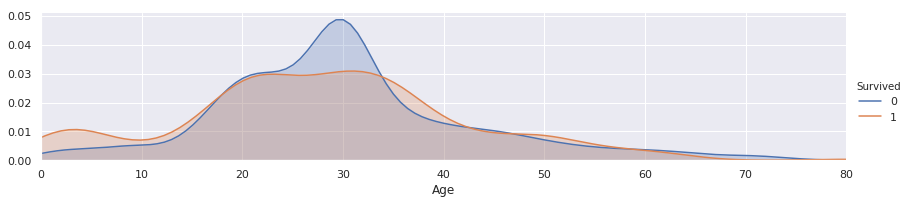

In [809]:
facet= sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age",shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()

plt.show()

In [810]:
### rellenar con clases

for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [811]:
### Cambiar ciudades por números? i.e S=0, Q=1, C=2?

Emb_map={"S":0, "Q": 1, "C": 2}

for dataset in train_test_data:
    dataset["Embarked"]=dataset["Embarked"].map(Emb_map)

In [812]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,30.0,0,0,330877,8.4583,NaN,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,2,2


In [813]:
### tasas

train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

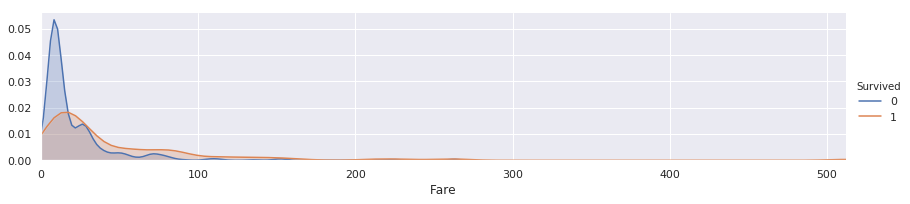

In [814]:
facet= sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()

plt.show()

(0, 20)

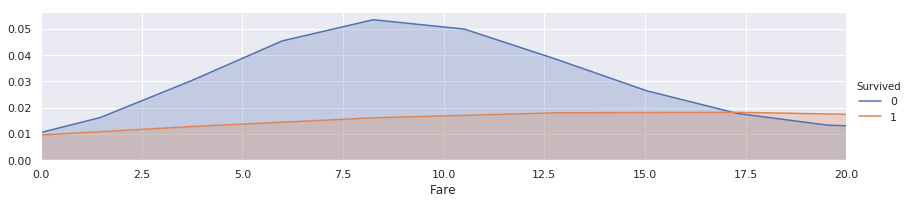

In [815]:
facet= sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare",shade=True)
facet.set(xlim=(0,train["Fare"].max()))
facet.add_legend()

plt.xlim(0,20)

In [816]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
E101           3
F33            3
D              3
F2             3
D33            2
B5             2
C78            2
C2             2
B28            2
B35            2
C68            2
C83            2
E33            2
D26            2
E24            2
E44            2
B58 B60        2
C93            2
C92            2
F4             2
F G73          2
D36            2
B49            2
C126           2
E67            2
E8             2
              ..
C30            1
D30            1
A20            1
C128           1
E63            1
E58            1
C45            1
E34            1
C49            1
D28            1
B71            1
D7             1
D47            1
B41            1
E40            1
D49            1
B86            1
D37            1
B19            1
B30            1
C46            1
C103           1
E12            1
B50            1
B79            1
B38            1
A19            1
D50           

In [817]:
cabin_map={"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}

train.head(20)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,30.0,0,0,330877,8.4583,NaN,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,2,2


In [818]:

for dataset in train_test_data:
    dataset["Cabin"]=dataset["Cabin"].str[:1]
    dataset["Cabin"]=dataset["Cabin"].map(cabin_map)

In [819]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,"Moran, Mr. James",0,30.0,0,0,330877,8.4583,NaN,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1.6,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,2,2


In [820]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"),inplace=True)

In [821]:
train["Famili Size"]=train["SibSp"]+train["Parch"]
test["Famili Size"]=test["SibSp"]+test["Parch"]

In [822]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Famili Size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0.8,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2.0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.8,0,2,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2.0,0,0,0


In [823]:
feat_drop=["SibSp","Parch","Ticket","Name"]
train=train.drop(feat_drop,axis=1)
test=test.drop(feat_drop,axis=1)

In [824]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famili Size
0,1,0,3,0,22.0,7.2500,2.0,0,0,1
1,2,1,1,1,38.0,71.2833,0.8,2,2,1
2,3,1,3,1,26.0,7.9250,2.0,0,1,0
3,4,1,1,1,35.0,53.1000,0.8,0,2,1
4,5,0,3,0,35.0,8.0500,2.0,0,0,0


# AL lío

In [825]:
import numpy as np

In [826]:
Ysur=np.array(train)[:,1].reshape(891,1)
XPclass=np.array(train)[:,2]
XSex=np.array(train)[:,3]
XAge=np.array(train)[:,4]
XFare=np.array(train)[:,5]
XCabin=np.array(train)[:,6]
XEmbarked=np.array(train)[:,7]
XTitle=np.array(train)[:,8]
XFamSize=np.array(train)[:,9]
X= np.zeros((891,8))
X[:,0]=XPclass
X[:,1]=XSex
X[:,2]=XAge
X[:,3]=XFare
X[:,4]=XCabin
X[:,5]=XEmbarked
X[:,6]=XTitle
X[:,7]=XFamSize
X=np.transpose(X)
Ysur=np.transpose(Ysur)
W=np.random.rand(1,8)
Y=Ysur
B=0
np.shape(W)

(1, 8)

In [827]:
### FORWARD
def forward(P,Q,R):
    Z=np.dot(P,Q)+R
    print(np.shape(Z))
    A=1/(1+np.exp(-Z))
    print(np.shape(A))
    return [Z,A]

[Z,A]=forward(W,X,B)

(1, 891)
(1, 891)


In [828]:
### BACKWARD

def backward(a,y,x):
    dz=a-y
    dw=np.dot(x,np.transpose(dz))/891
    dw=np.transpose(dw)
    print(np.shape(dw))
    print(np.shape(dz))
    db=np.sum(dz)/891
    print(np.shape(db))
    return[dw,db]
[dW,dB]=backward(A,Y,X)

(1, 8)
(1, 891)
()


In [829]:
### Regresion

def reg(w,x,b,y,alpha):
    [z,a]=forward(w,x,b)
    [dw,db]=backward(a,y,x)
    nw=w-alpha*dw
    nb=b-alpha*db
    return[nw,nb]

In [830]:
### Entrenamiento (teórico)
def entr(w,x,b,y,alpha,n):
    for i in range(n):
        [w,b]=reg(w,x,b,y,alpha)
    return([w,b])

In [831]:
### Entrenar
for i in range(200):
    [W,B]=entr(W,X,B,Y,2.3,10)
print(W)
print(B)
for i in range(100):
    [W,B]=entr(W,X,B,Y,1-(i^2)*0.3/10000,10)
print(W)
print(B)
for i in range(100):
    [W,B]=entr(W,X,B,Y,0.1,10)
print(W)
print(B)

(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(

(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(

(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(

(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(

(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(

(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(

(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(

(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(

(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(

(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(

(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(

(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(1, 891)
(1, 8)
(1, 891)
()
(1, 891)
(

In [832]:
#PROBAR

In [833]:
test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famili Size
0,892,3,0,34.5,7.8292,2.0,1,0.0,0
1,893,3,1,47.0,7.0000,2.0,0,2.0,1
2,894,2,0,62.0,9.6875,2.0,1,0.0,0
3,895,3,0,27.0,8.6625,2.0,0,0.0,0
4,896,3,1,22.0,12.2875,2.0,0,2.0,2
5,897,3,0,14.0,9.2250,2.0,0,0.0,0
6,898,3,1,30.0,7.6292,2.0,1,1.0,0
7,899,2,0,26.0,29.0000,2.0,0,0.0,2
8,900,3,1,18.0,7.2292,2.0,2,2.0,0
9,901,3,0,21.0,24.1500,2.0,0,0.0,2


In [834]:
Xclass=np.array(test)[:,1:]
np.shape(Xclass)
Ztest=np.dot(W,np.transpose(Xclass))+B

res=np.int_(np.round(1/(1+np.exp(-Ztest))))
res[0][-4]=0
print(res)

ID=np.array(test)[:,0]
Sol=np.random.rand(418,2)
Sol[:,0]=ID
Sol[:,1]=res

print(Sol)

[[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
  1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0
  1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
  0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1
  0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0
  1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0
  1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0
  0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0
  1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1
  0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1
  0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1]]
[[8.920e+02 0.000e+00]
 [8.930e+02 1.000e+00]
 [8.940e+02 0.000e+00]
 [8.950e+02 0.000e+00]
 [8.960e+02 1.000e+00]
 [8.970e+02 0.000e+00]


In [835]:
###Guardar
np.savetxt('titanic1.csv', Sol, fmt='%.2f', delimiter=",",header="PassengerId,Survived")